In [3]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
df = pd.read_excel('../Outputs/GIS_Lump_Excels/Lump_0816_All.xlsx')

#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]

# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

#convet area to ha
df['AREA_08_ha'] = (df['AREA_08_M2'] / 10000)
df['AREA_16_ha'] = (df['AREA_16_M2'] / 10000)

# Group by land use and calculate the sum of area
df16 = df.groupby('secon_16')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8 = df.groupby('secon_08')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

#dflabel = df.groupby('secon_16')['AREA_16_M2'].agg([
    #np.sum,
    #np.mean,
    #np.count_nonzero,]).reset_index()
    

#Change the column names so that they can be concatinated
df16.columns = ['Land Use', 'Sum', 'Mean', 'Std', 'Count non zero']
df8.columns = ['Land Use', 'Sum', 'Mean', 'Std','Count non zero']


concat = pd.concat([df16, df8])

final = pd.merge(df16, df8,
                left_on='Land Use', right_on='Land Use',
                how = 'left')

#Change the column names so for analysis
final.columns = ['Land Use', 'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016',
              'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008']

final['% Change Area'] = (((final['Sum 2016'] - final['Sum 2008'])- final['Sum 2016'])*100)
final['% Change Count'] = (((final['Count 2016'] - final['Count 2008'])- final['Count 2016'])*100)

#final.fillna(0)

final.to_excel('../Outputs/Pandas_Lump_Excels/Grouped_all_Lump0816_365_5152.xlsx')
final

,Land Use,Sum 2016,Mean 2016,Std 2016,Count 2016,Sum 2008,Mean 2008,Std 2008,Count 2008,% Change Area,% Change Count
0,0,0,0,0,0,0,0,0,0,0,0
1,11,"47,992,460","17,808","86,816","2,695","403,143,840","92,358","181,960","4,365","-40,314,384,002","-436,500"
2,12,"584,236,779","102,193","557,783","5,717","9,239,582,692","816,362","1,378,840","11,318","-923,958,269,197","-1,131,800"
3,13,"24,311,838","1,471","28,579","16,527","271,994,263","8,119","89,854","33,500","-27,199,426,279","-3,350,000"
4,21,"314,627,529","30,523","77,538","10,308","1,635,784,061","132,484","168,090","12,347","-163,578,406,149","-1,234,700"
5,31,"78,097",165,361,472,"3,887",81,65,48,"-388,689","-4,800"
6,32,"325,430",127,323,"2,562","3,817,503","1,518","5,681","2,515","-381,750,272","-251,500"
7,33,"61,113",36,79,"1,698","6,977,137","3,955","9,018","1,764","-697,713,696","-176,400"
8,34,93,8,9,11,872,9,16,99,"-87,219","-9,900"
9,35,85,12,3,7,949,14,16,66,"-94,900","-6,600"


Text(0.5,1,'interesting graph\nCheck out my line graph')

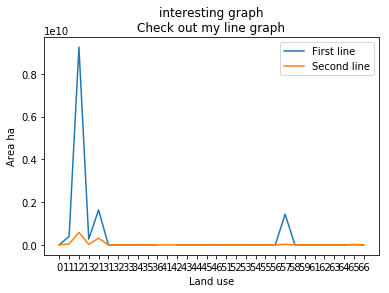

In [5]:
#Plot a line graph
x1 = final['Land Use']
x2 = final['Land Use']
y1 = final['Sum 2008']
y2 = final['Sum 2016']
plt.plot(x1, y1, label = 'First line')
plt.plot(x2, y2, label = 'Second line')
plt.xlabel('Land use')
plt.ylabel('Area ha')
plt.legend()
plt.title("interesting graph\nCheck out my line graph")

Text(0.5,1,'interesting graph\nCheck out my line graph')

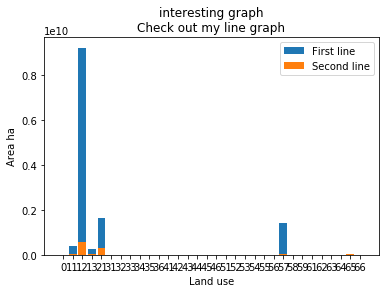

In [6]:
#Plot a bar graph
plt.title("interesting graph\nCheck it out")
x1 = final['Land Use']
x2 = final['Land Use']
y1 = final['Sum 2008']
y2 = final['Sum 2016']
plt.bar(x1, y1, label = 'First line')
plt.bar(x2, y2, label = 'Second line')
plt.xlabel('Land use')
plt.ylabel('Area ha')
plt.legend()
plt.title("interesting graph\nCheck out my line graph")

No handles with labels found to put in legend.


Text(0.5,1,'interesting graph\nCheck out my line graph')

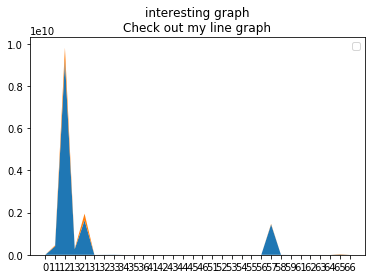

In [7]:
#Plot a stack plot
plt.title("interesting graph\nCheck it out")
x = final['Land Use']

y1 = final['Sum 2008']
y2 = final['Sum 2016']

plt.stackplot(x, y1, y2)


plt.legend()
plt.title("interesting graph\nCheck out my line graph")